# Airline On-Time Performance Data, US 2008 
## by Sarah Akinkunmi


## Introduction
This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, for year 2008. It contains more than 2 million records and 29 features.

## Summary of findings
2008 flights in the USA from January to April were mostly earlier than expected on right on time. The delays were mostly caused by late aircrafts and then National Airspace System (NAS) delays, although we find out that NAS delay have the strongest relationship with delay times. This flights mostly covered short distances, however, there was no relationship between the distances and delayed times. The most common destinations for flights were the same as the departure states. Northwest Airlines Inc. (NW) have the most average delays. Lastly, delay times and NAS delays have a strong relationship for each of the major destinations in each month. 

The questions I generated insights on are:
- How are delay times distributed? Are many flights were delayed or not?  
- What is the major cause of delay?  
- Were the flights over more longer distances than short distances?
- What are the top destinations and origins for the flights?
- Does distance affect delay times?
- Do some airlines experience more delays than others?
- What is the relationship between delay times and the causes of delay?
- How do the delay times and NAS delay vary with the most common destinations in each month?



## Data Wrangling

Issues that are corrected
- Combining `Year`, `Month` and `DayofMonth` columns into one
- Removing unnecessary columns
- Dropping duplicate rows, if any

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loading the datasets into a pandas dataframe
flight_details = pd.read_csv("2008.csv")
airport = pd.read_csv("airports.csv")
carriers = pd.read_csv("carriers.csv")
plane_data = pd.read_csv("plane-data.csv")

In [3]:
# Saving a copy of the dataset
flight_dets = flight_details.copy()

Combining `Year`, `Month` and `DayofMonth` columns into `Date`

In [4]:
# converting the variables to strings
flight_dets['Year'] = flight_dets['Year'].astype(str)
flight_dets['Month'] = flight_dets['Month'].astype(str)
flight_dets['DayofMonth'] = flight_dets['DayofMonth'].astype(str)

In [5]:
# making the date column
flight_dets['Date'] = pd.to_datetime(flight_dets['Year'] + '-' + flight_dets['Month'] + '-' + flight_dets['DayofMonth'])

In [6]:
# inserting it into the first column of the dataframe
first_col = flight_dets.pop('Date')
flight_dets.insert(0, 'Date', first_col)

Removing unnecessary columns -`Year`, `Month` and `DayofMonth` and `DayOfWeek`, `TaxiIn`, `TaxiOut`

In [7]:
flight_dets.drop(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'TaxiIn', 'TaxiOut'], axis=1, inplace=True)

Dropping duplicate rows

In [8]:
flight_dets.drop_duplicates(inplace=True)

## Data Explorations and Explanations

In [9]:
# since blue is the most common brand colour for airlines in the usa (https://apex.aero/articles/logochromatic-airline-brand-colors-region/), that would be the main colour
main_color = sb.color_palette()[0]

## Question: How are delay times distributed? Are many flights were delayed or not? 

More than 100,000 flights were earlier than expected and long delays over 50 minutes are less frequent.

## Visualization

In [10]:
# creating new variable calculating the delay time in minutes
flight_dets['delay_time'] = flight_dets['ActualElapsedTime'] - flight_dets['CRSElapsedTime']

In [11]:
# checking the maximum and minimum values to help create our bins
flight_dets['delay_time'].describe()

count    2.319117e+06
mean    -1.115588e+00
std      1.420628e+01
min     -1.510000e+02
25%     -9.000000e+00
50%     -3.000000e+00
75%      5.000000e+00
max      5.700000e+02
Name: delay_time, dtype: float64

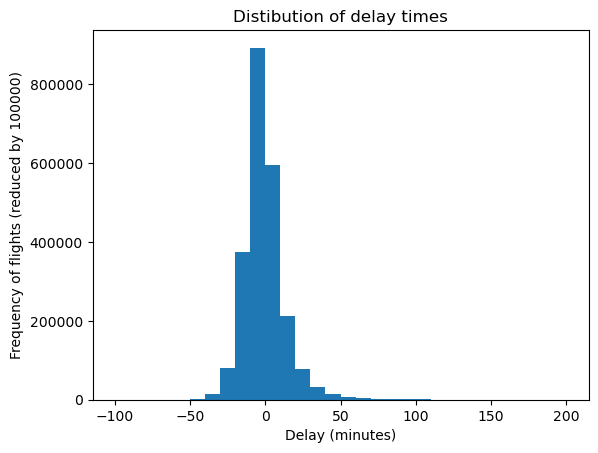

In [12]:
# plotting the data 
bins = np.arange(-100, 200 + 10, 10)
plt.hist(flight_dets['delay_time'], bins=bins, color=main_color);
plt.title("Distibution of delay times")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency of flights (reduced by 100000)");

## Question: What type of delay caused the most delays?

Late aircrafts are the most common delay causes followed by the National Airport System delays. Security delays are the least common cause of delays. 

## Visualization

In [13]:
# statistical description of the numerical variables
flight_dets.describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay_time
count,2.324771e+06,2.389213e+06,2.319117e+06,2.389213e+06,2.389213e+06,2.319117e+06,2.388806e+06,2.319117e+06,2.319117e+06,2.324771e+06,2.389213e+06,2.389213e+06,2.389213e+06,584581.000000,584581.000000,584581.000000,584581.000000,584581.000000,2.319117e+06
mean,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,2.213890e+03,1.286188e+02,1.293775e+02,1.051016e+02,1.027355e+01,1.143634e+01,7.261584e+02,2.697206e-02,2.366470e-03,15.752934,2.938253,16.158442,0.080459,20.976782,-1.115588e+00
std,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,1.951393e+03,7.025303e+01,6.948246e+01,6.766801e+01,3.963431e+01,3.653231e+01,5.571763e+02,1.620018e-01,4.858879e-02,40.035534,19.166694,30.534190,1.742582,38.617200,1.420628e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-9.100000e+01,-9.200000e+01,1.700000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.510000e+02
25%,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,6.050000e+02,7.800000e+01,8.000000e+01,5.600000e+01,-9.000000e+00,-4.000000e+00,3.250000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000e+00
50%,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.544000e+03,1.110000e+02,1.110000e+02,8.700000e+01,0.000000e+00,0.000000e+00,5.830000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000,-3.000000e+00
75%,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.631000e+03,1.600000e+02,1.600000e+02,1.340000e+02,1.500000e+01,1.100000e+01,9.570000e+02,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000,5.000000e+00
max,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,9.050000e+02,1.435000e+03,8.860000e+02,2.461000e+03,2.467000e+03,4.962000e+03,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000,5.700000e+02


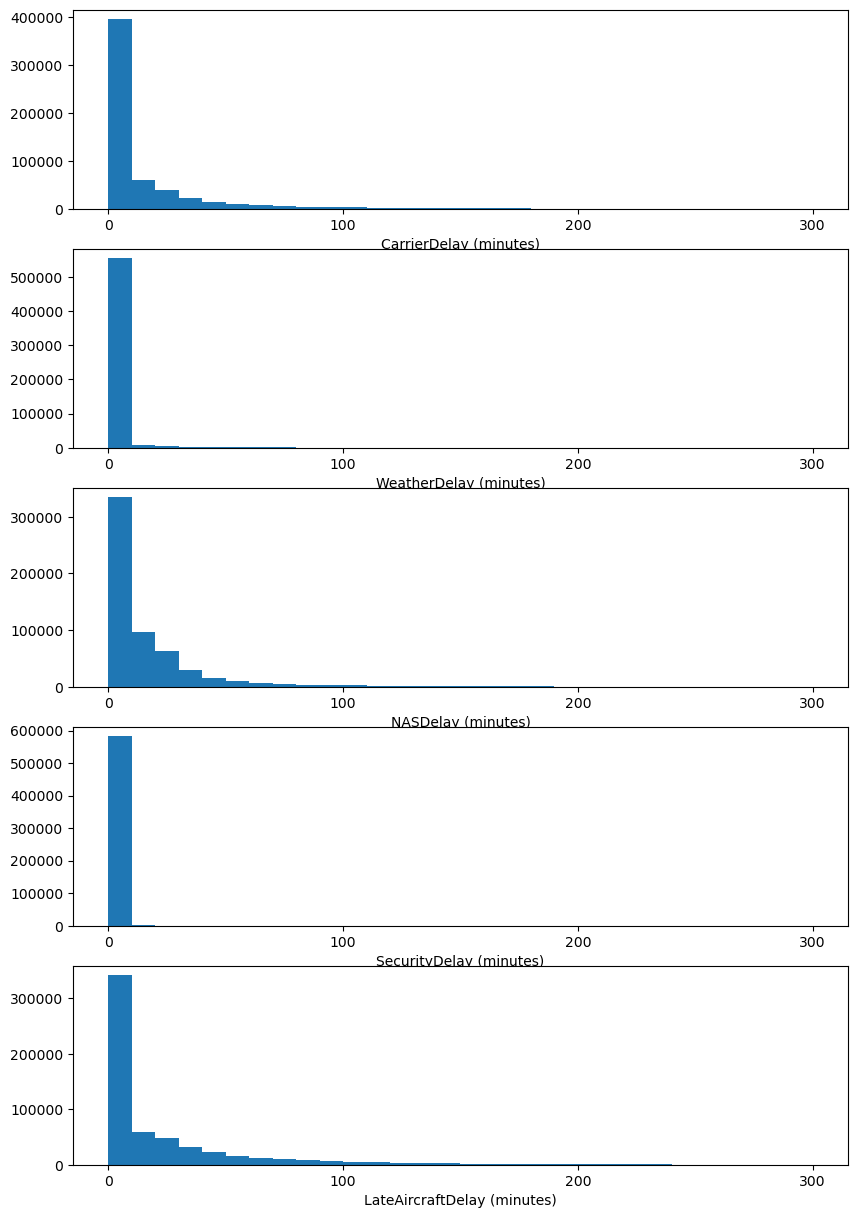

In [14]:
# # plotting the distribution of each delay cause
fig, ax = plt.subplots(nrows=5, figsize = [10, 15])
variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
ticks = [0, 100, 200, 300]

for _ in range(len(variables)):
  var = variables[_]
  bins = np.arange(min(flight_dets[var]), 300 + 10, 10)
  ax[_].hist(data = flight_dets, x = var, bins = bins)
  ax[_].set_xlabel('{} (minutes)'.format(var))
  ax[_].set_xticks(ticks)

plt.show()

## Question: Were the flights over more longer distances than short distances?

Most flights covered short distances (< 1000 miles)

## Visualization

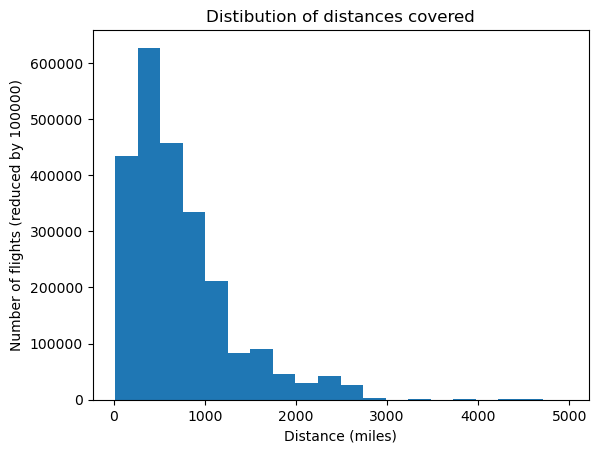

In [15]:
# plotting the data
plt.hist(flight_dets['Distance'], bins=20, color=main_color);
plt.title("Distibution of distances covered")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of flights (reduced by 100000)");

## Question: What are the top destinations and origins for the flights?

Atlanta is the state most flights fly from return to. Comparing the visualizations, the top 10 states are the same.

## Visualization

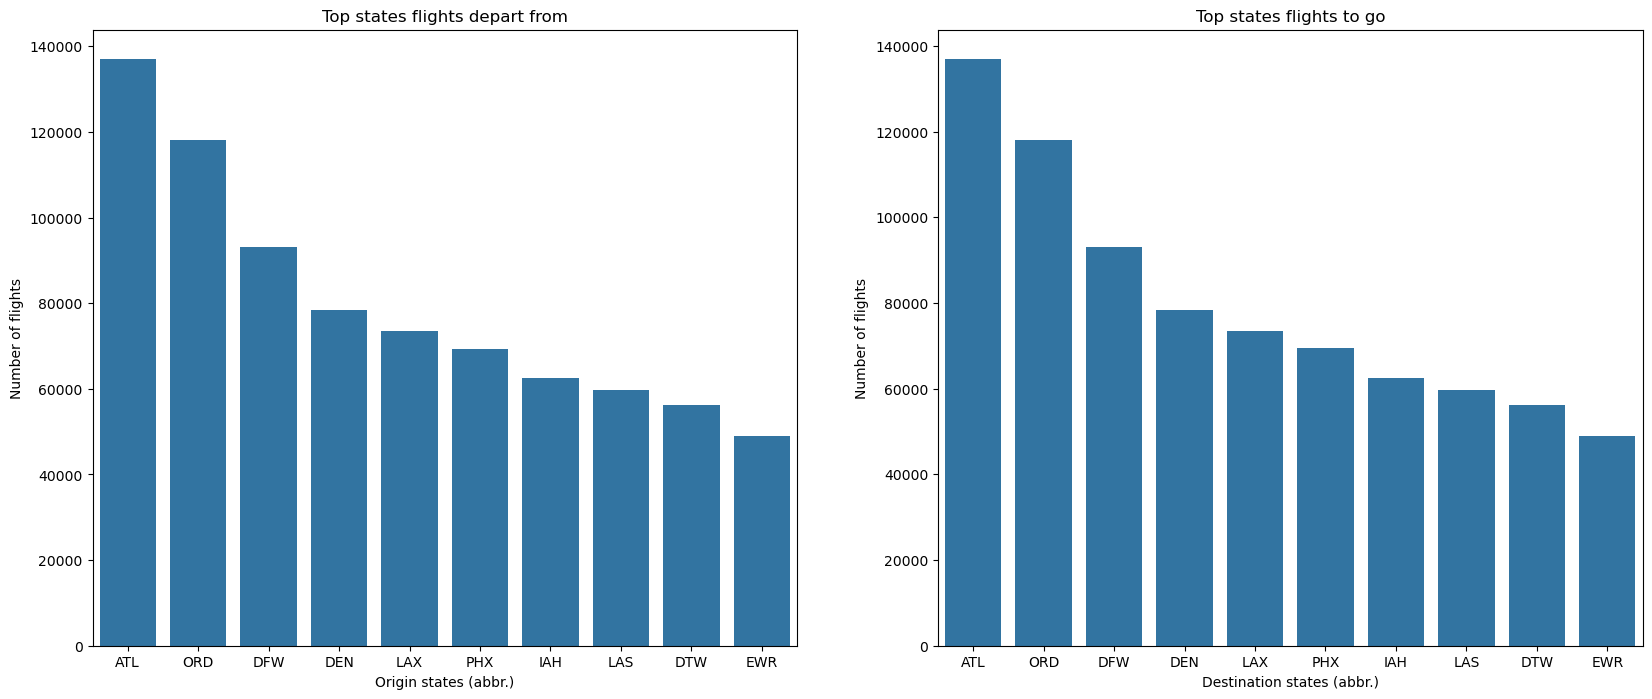

In [16]:
# selecting the top 10 origin cities to reduce noise
order = flight_dets['Origin'].value_counts()[:10].index

plt.figure(figsize=[20, 8])
# plotting the data
plt.subplot(1, 2, 1)
sb.countplot(data = flight_dets, x = 'Origin', color = main_color, order = order);
plt.title("Top states flights depart from")
plt.xlabel("Origin states (abbr.)")
plt.ylabel("Number of flights");

# selecting the top 10 destination cities
order = flight_dets['Dest'].value_counts()[:10].index

# plotting the data
plt.subplot(1, 2, 2)
sb.countplot(data = flight_dets, x = 'Dest', color = main_color, order = order);
plt.title("Top states flights to go")
plt.xlabel("Destination states (abbr.)")
plt.ylabel("Number of flights");

## Question: Does distance affect delay times?

There is a slight negative correlation between delay and distance

## Visualization

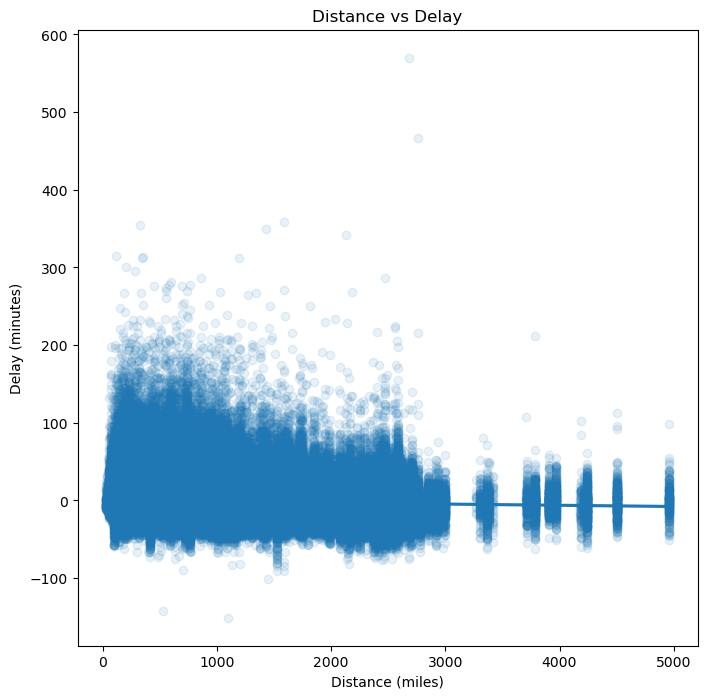

In [17]:
# plotting the data
plt.figure(figsize=[8,8])
sb.regplot(data=flight_dets, x='Distance', y='delay_time', x_jitter=0.3, scatter_kws={'alpha':1/10}, ci=None);
plt.title('Distance vs Delay')
plt.xlabel('Distance (miles)')
plt.ylabel("Delay (minutes)");
plt.show()

## Question: Do some airlines experience more delays than others?

Northwest Airlines Inc. (NW) experience the most delays on average, followed by AirTran Airways Corporation (FL), Frontier Airlines Inc. (F9).

## Visualization

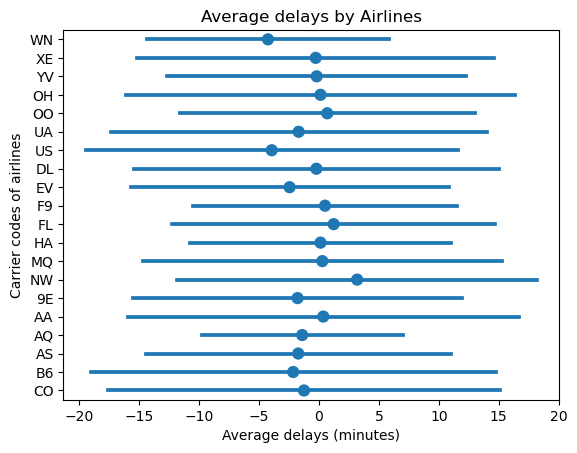

In [18]:
# plotting the data
sb.pointplot(data=flight_dets, x='delay_time', y='UniqueCarrier', color=main_color, errorbar='sd', linestyles="");
plt.title("Average delays by Airlines")
plt.xlabel("Average delays (minutes)")
plt.ylabel("Carrier codes of airlines");

## Question: What is the relationship between delay times and the causes of delay?

Delay time shows a strong positive correlation with NASDelay but a strong negative correlation with Carrier and Late Aircraft delays. There is a weak positive correlation between Delay time and Security delays and a moderately strong correlation between delay time and Weather delays. 

NAS Delays are within the control of the National Airspace System and may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are also reported through OPSNET. (https://aspm.faa.gov/aspmhelp/index/Types_of_Delay.html). Therefore, it is more likely for these to cause long delays depending on the severity of the issue.

## Visualization

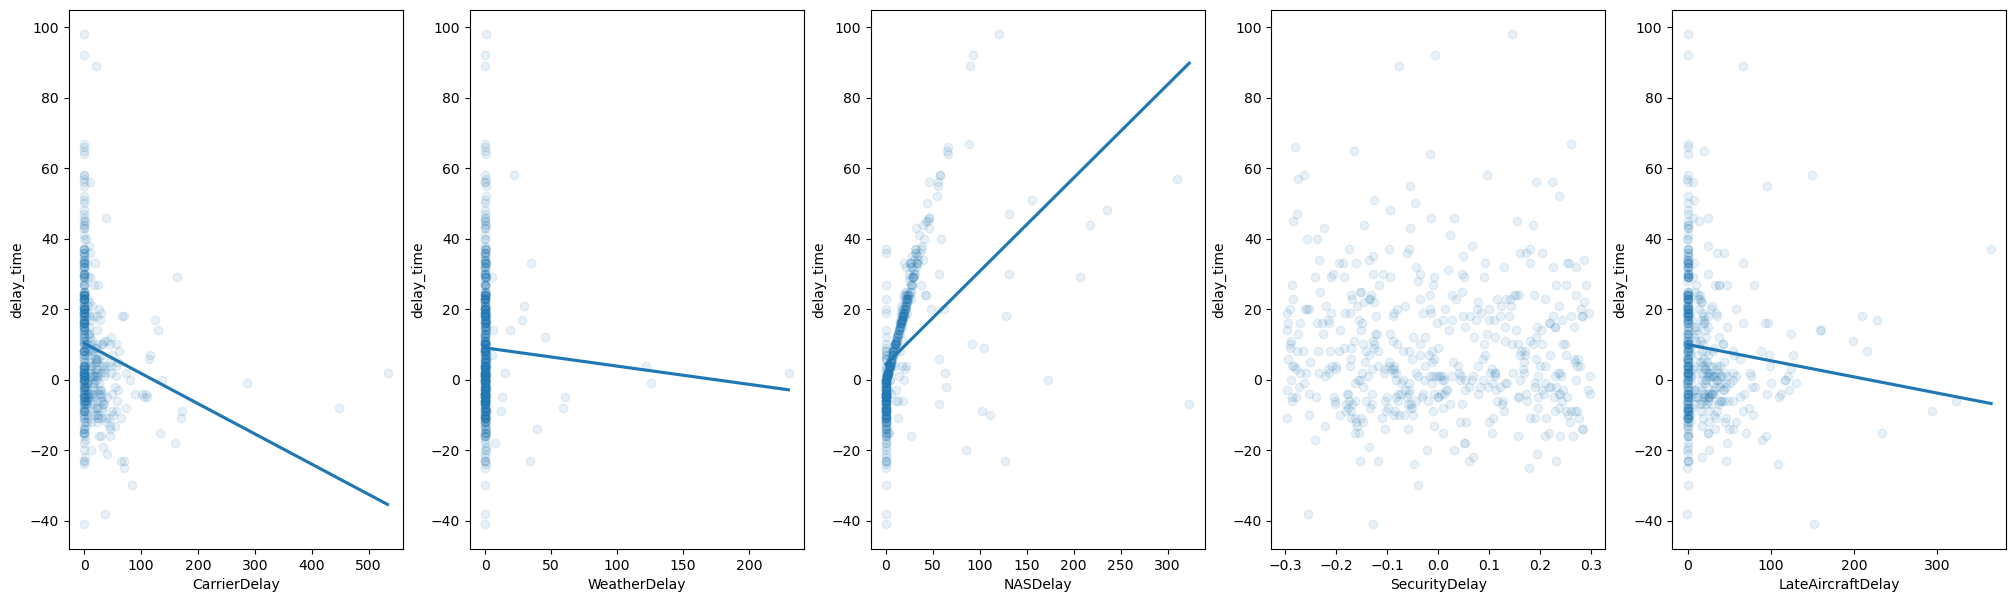

In [19]:
# creating a list of the delay causes variables
variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# sample 2000 flights so plots load faster
sample = np.random.choice(flight_dets.shape[0], 2000, replace=False)
flight_samp = flight_dets.loc[sample, :]

x = 1
plt.figure(figsize=[25, 7])
for _ in variables:
  plt.subplot(1, 5, x)
  sb.regplot(data=flight_samp, x=_, y='delay_time', x_jitter=0.3, scatter_kws={'alpha':1/10}, ci=None);
  x += 1


## Question: How do the delay times and NAS delay vary with the most common destinations in each month? 

There is a positive correlation between delay time and NAS delay for the top destinations in each month, further strengthening the narrative that NAS delays affect the delay times.

## Visualization

In [20]:
# Extracting the months from the date variable
flight_dets['Month'] = flight_dets['Date'].dt.month_name()

In [21]:
# Converting month to categorical variable to ensure order
ordered_months = pd.api.types.CategoricalDtype(categories=flight_dets['Month'].unique(), ordered=True)
flight_dets['Month'] = flight_dets['Month'].astype(ordered_months)

In [22]:
# picking the top 10 destinations and adding them to a list
order = flight_dets['Dest'].value_counts()[:10].index.tolist()
order

['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'PHX', 'IAH', 'LAS', 'DTW', 'EWR']

In [23]:
# selecting records with the top destinations
top_dest = flight_dets.loc[flight_dets.apply(lambda x: x.Dest in order, axis=1)]
top_dest

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay_time,Month
34,2008-01-03,926.0,920,1112.0,1115,WN,1481,N227WN,166.0,175.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,-9.0,January
35,2008-01-03,1544.0,1340,1728.0,1535,WN,1600,N769SW,164.0,175.0,...,0,NaN,0,113.0,0.0,0.0,0.0,0.0,-11.0,January
36,2008-01-03,1931.0,1805,2119.0,2000,WN,2100,N704SW,168.0,175.0,...,0,NaN,0,21.0,0.0,0.0,0.0,58.0,-7.0,January
37,2008-01-03,2206.0,2120,2353.0,2315,WN,3154,N252WN,167.0,175.0,...,0,NaN,0,9.0,0.0,0.0,0.0,29.0,-8.0,January
38,2008-01-03,658.0,655,847.0,850,WN,3230,N728SW,169.0,175.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,-6.0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389156,2008-04-17,1640.0,1640,1758.0,1810,DL,1154,N903DA,78.0,90.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,-12.0,April
2389160,2008-04-17,1600.0,1540,1719.0,1655,DL,1157,N999DN,79.0,75.0,...,0,NaN,0,10.0,0.0,14.0,0.0,0.0,4.0,April
2389173,2008-04-17,1653.0,1651,2330.0,2321,DL,1170,N6710E,277.0,270.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,7.0,April
2389203,2008-04-17,1157.0,1200,1335.0,1337,DL,1199,N993DL,98.0,97.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,April


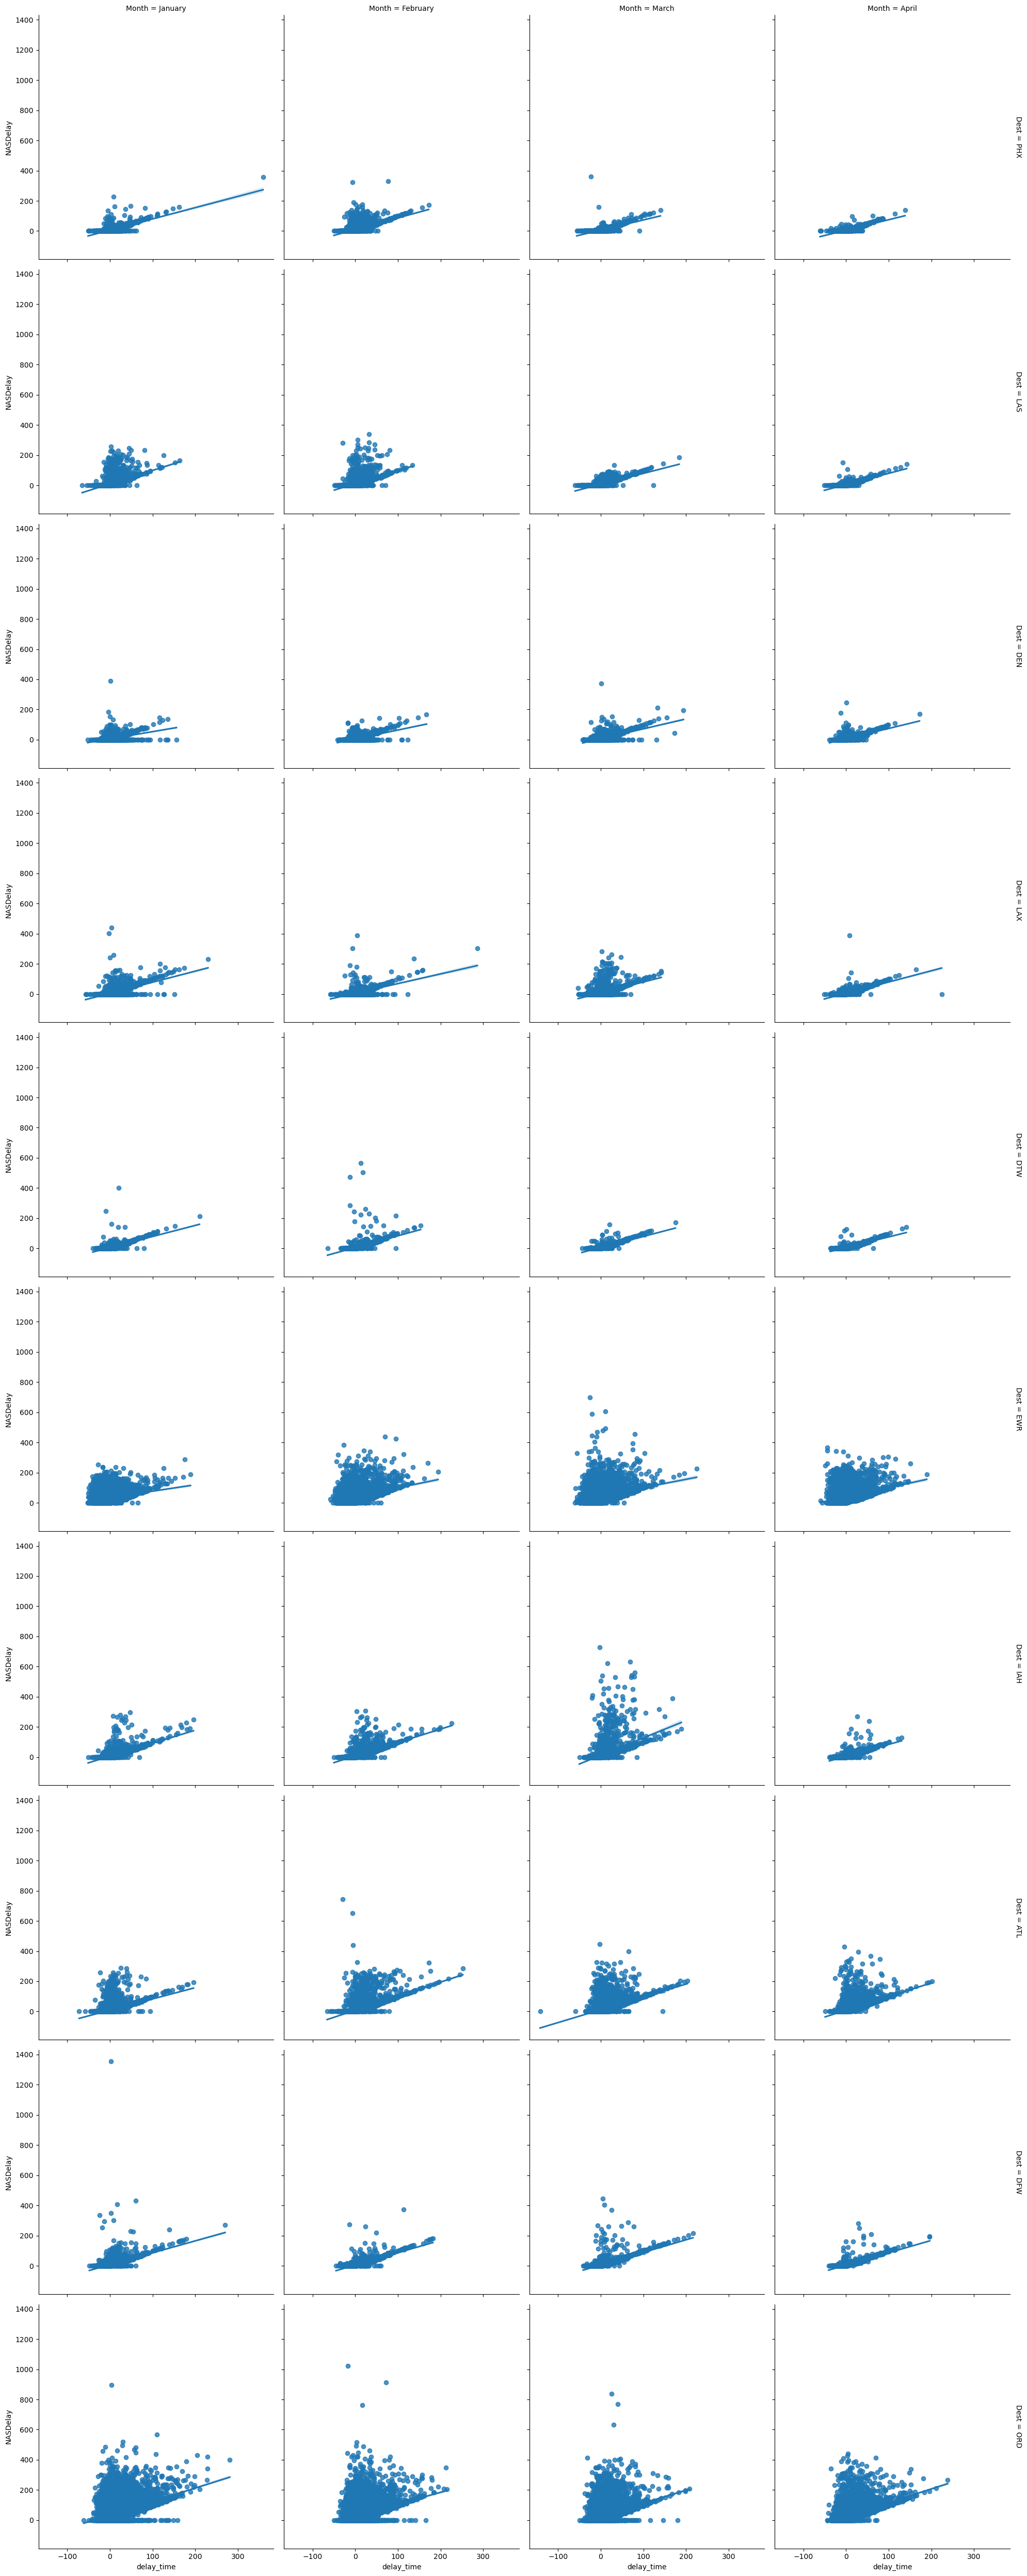

In [24]:
# plotting the data
g = sb.FacetGrid(data = top_dest, row = 'Dest', col = 'Month', height = 5, margin_titles = True)
g.map(sb.regplot, 'delay_time', 'NASDelay');

In [ ]:
!jupyter nbconvert Part_II_explanation_notebook.ipynb --to slides --post serve --no-input --no-prompt